In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt  
from util import get_data, plot_data  
import datetime 
import scipy.optimize as spo
import math
# This is the function that will be tested by the autograder 
# The student must update this code to properly implement the functionality
def str2dt(strng):  
    year,month,day = map(int,strng.split('-')) 
    return datetime.datetime(year,month,day) 
def sharpe_ratio(data,allocs):
    data*=allocs
    data=data.sum(axis=1)
    data=data.pct_change(periods=1)
    return -(np.mean(data)/np.std(data))*(252)**(1/2)
def optimize(data, error_func,guess,cons,bnds):
    
    result = spo.minimize(error_func, guess, args=(data,), method = 'SLSQP', bounds=bnds,
               constraints=cons)
    return [round(x,2) for x in result.x]

In [2]:
def optimize_portfolio(sd, ed, syms,gen_plot=False ): 
    dates = pd.date_range(sd, ed)  
    prices_all = get_data(syms, dates)  # automatically adds SPY 
    prices = prices_all[syms]  # only portfolio symbols 
    prices_all/= prices_all.iloc[0]
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later 
    if 'SPY' in prices_all.columns:
        prices_all.drop("SPY",axis=1,inplace=True)
    allocs = np.array([1/len(symbols)]*len(symbols))
    guess=allocs
    constraints = ({ 'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})
    bnds=()
    for i in range(len(symbols)):
        bnds+=((0,1),)
    allocs=list(optimize(data= prices_all, error_func= sharpe_ratio,guess=guess,cons=constraints,bnds=bnds))
    prices_all*=allocs
    prices_all=pd.DataFrame(prices_all.sum(axis=1))
    prices_all.columns=["Portfolio"]
    prices_all["SPY"]= prices_SPY
    if gen_plot:
        plot_data(prices_all)
    prices_all["daily returns"]=prices_all["Portfolio"].pct_change()
    sddr=np.std(prices_all["daily returns"])
    adr=np.mean(prices_all["daily returns"])
    sr=(adr/sddr)*(252)**(1/2)
    cr=(prices_all["Portfolio"].iloc[-1]/prices_all["Portfolio"].iloc[0])-1
    return allocs,cr, adr, sddr, sr

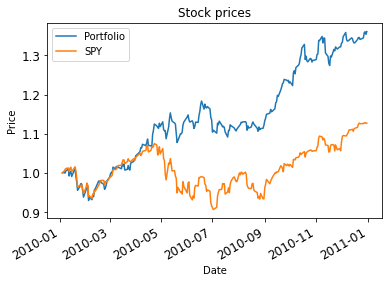

[0.0, 0.4, 0.6, 0.0]

In [3]:
###test1
start_date=str2dt('2010-01-01')
end_date=str2dt('2010-12-31')
symbols=['GOOG', 'AAPL', 'GLD', 'XOM']
optimize_portfolio(start_date, end_date, symbols,gen_plot=True)[0]

In [4]:
###test2
start_date=str2dt('2004-01-01')
end_date=str2dt('2006-01-01')
symbols=['AXP', 'HPQ', 'IBM', 'HNZ'] 
optimize_portfolio(start_date, end_date, symbols,gen_plot=False)[0]

[0.78, 0.22, 0.0, 0.0]

In [5]:
###test3
start_date=str2dt('2004-12-01')
end_date=str2dt('2006-05-31')
symbols=['YHOO', 'XOM', 'GLD', 'HNZ']
optimize_portfolio(start_date, end_date, symbols,gen_plot=False)[0]

[0.0, 0.08, 0.59, 0.34]

In [6]:
###test4
start_date=str2dt('2005-12-01')
end_date=str2dt('2006-05-31')
symbols=['YHOO', 'HPQ', 'GLD', 'HNZ']
optimize_portfolio(start_date, end_date, symbols,gen_plot=False)[0]

[0.0, 0.1, 0.25, 0.65]

In [7]:
###test5
start_date=str2dt('2005-12-01')
end_date=str2dt('2007-05-31')
symbols=['MSFT', 'HPQ', 'GLD', 'HNZ']
optimize_portfolio(start_date, end_date, symbols,gen_plot=False)[0]

[0.0, 0.27, 0.11, 0.62]

In [8]:
###test6
start_date=str2dt('2006-05-31')
end_date=str2dt('2007-05-31')
symbols=['MSFT', 'AAPL', 'GLD', 'HNZ']  
optimize_portfolio(start_date, end_date, symbols,gen_plot=False)[0]

[0.42, 0.32, 0.0, 0.26]

In [9]:
###test7
start_date=str2dt('2011-01-01')
end_date=str2dt('2011-12-31')
symbols=['AAPL', 'GLD', 'GOOG', 'XOM'] 
optimize_portfolio(start_date, end_date, symbols,gen_plot=False)[0]

[0.46, 0.37, 0.0, 0.17]

In [10]:
###test8
start_date=str2dt('2010-01-01')
end_date=str2dt('2010-12-31')
symbols=['AXP', 'HPQ', 'IBM', 'HNZ']
optimize_portfolio(start_date, end_date, symbols,gen_plot=False)[0]

[0.0, 0.0, 0.0, 1.0]